In [26]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from src.features.build_features import df, vocabulary, X, X_tfidf, corpus, corpus_tfidf

In [28]:
id2word = {v:k for v, k in sorted((value, key) for (key,value) in vocabulary.items())}

In [29]:
X.shape

(33734, 23204)

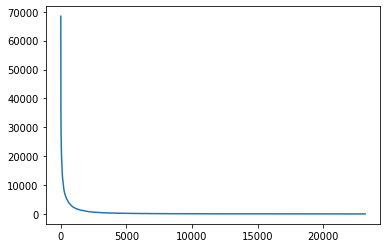

In [30]:
plt.plot(np.arange(X.shape[1]), np.sort(np.asarray(X.sum(axis=0)).reshape(-1))[::-1])

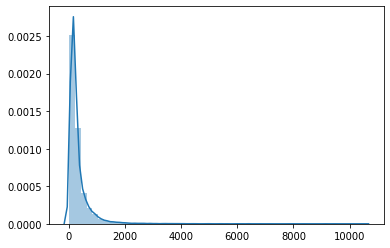

In [31]:
sns.distplot(X.sum(axis=1))

In [32]:
np.sum(X.sum(axis=1) >= 1500)

703

In [33]:
np.sum(X.sum(axis=1) < 25)

773

In [35]:
X = X[tails_idx, :]
X_tfidf = X_tfidf[tails_idx, :]
df = df.iloc[tails_idx]

In [34]:
tails_idx = (np.asarray(X.sum(axis=1) > 25).reshape(-1)) * (np.asarray(X.sum(axis=1) <= 1500).reshape(-1))

# Update X and df based on the removed speeces

In [ ]:
X.apply

In [83]:
prior = np.asarray((X.sum(axis=0) / X.sum())).reshape(-1)

In [117]:
row = X[0,:]

In [127]:
def populate_row_1500(row, prior):
    # esxtract the used words
    words = row.nonzero()[1]

    observed = row / row.sum()
    observed = np.asarray(observed.todense()).reshape(-1)

    # calculate the posterior probability 
    posterior = observed*prior / np.sum(observed*prior)

    additional_words = np.random.choice(
        a = np.arange(X.shape[1]),
        size = 1500-len(words),
        p = posterior
    )

    return np.concatenate((words, additional_words)).astype('uint16')



In [140]:
populated_data = [populate_row_1500(row, prior) for row in X ]

In [159]:
populated_mat = np.empty((X.shape[0], 1500))

for i, row in enumerate(populated_data):
    populated_mat[i,:] = row


In [162]:
np.savetxt("../data/processed/upsampled_data.csv", populated_mat, delimiter=",")

In [163]:
type(populated_mat[1,1])

numpy.float64

In [164]:
np.max(populated_mat)

23203.0